<a href="https://colab.research.google.com/github/kishore-R10/CRUD/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [250]:
df = pd.read_fwf("brain_body.txt")

In [251]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [252]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [253]:
from scipy.stats import zscore

newdf = df
newdf['brainsc'] = zscore(newdf['Brain'])
newdf['bodysc'] = zscore(newdf['Body'])
newdf = newdf[newdf['brainsc']<3]
newdf = newdf[newdf['brainsc']>-3]
newdf = newdf[newdf['bodysc']<3]
newdf = newdf[newdf['bodysc']>-3]


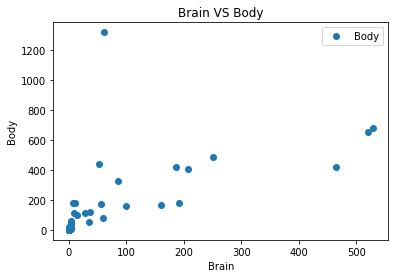

In [254]:
newdf.plot(x="Brain",y="Body",style ="o")
plt.title("Brain VS Body")
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

newdf = newdf.drop(columns=['brainsc','bodysc'])


In [255]:
newdf[['Brain','Body']].corr()

,Brain,Body
Brain,1.000000,0.650559
Body,0.650559,1.000000


1)corelation is greater than 0.6.
2)no tranformation is required.
3)we can develop a linear regression model

In [256]:
newdf.describe()

,Brain,Body
count,60.000000,60.000000
mean,52.066317,120.655333
std,119.468888,228.212145
min,0.005000,0.140000
25%,0.532500,3.975000
50%,3.150000,16.250000
75%,35.332500,128.875000
max,529.000000,1320.000000


In [257]:
X = newdf.iloc[:, :-1].values 
y = newdf.iloc[:, 1].values 

In [258]:


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

In [259]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [260]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [261]:
newdf.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [262]:
regressor.predict([[3.385]])

array([54.64353547])

In [263]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([ 54.80482773, 190.15007263,  55.5762255 ,  49.96325482,
        51.15822009, 312.31142839, 123.05249215, 791.84033236,
        54.52431945, 169.11195166,  50.99692783,  64.69274458,
       702.07768289,  52.28025321,  70.69562177,  53.40228633,
        51.78936372,  50.94783888])

In [264]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,3.90,54.804828
1,157.00,190.150073
2,17.00,55.576225
3,0.33,49.963255
4,2.60,51.158220
5,419.00,312.311428
6,440.00,123.052492
7,680.00,791.840332
8,25.60,54.524319
9,325.00,169.111952


In [265]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6496090753183525
